In [1]:
from keras.datasets import imdb
training_set, testing_set = imdb.load_data(index_from = 3)
X_train, y_train = training_set
X_test, y_test = testing_set

Using TensorFlow backend.


In [2]:
#check the first movie review
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Keras has already encoded the text to numbers, we can convert it back to words as per below.

In [3]:
word_to_id = imdb.get_word_index()
word_to_id = {key:(value+3) for key, value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
id_to_word = {value:key for key,value in word_to_id.items()}

In [4]:
#show original review in words
print(' '.join(id_to_word[id] for id in X_train[159] ))

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


In [5]:
#check the sentiment of the review
print(y_train[159])

0


In [6]:
print(' '.join(id_to_word[id] for id in X_train[22] ))

<START> i hate reading reviews that say something like 'don't waste your time this film stinks on ice ' it does to that reviewer yet for me it may have some sort of naïve charm if you like the other 'whistler' series films this one will be watchable if you like 40s noirish films this one will be watchable br br this film is not as good in my opinion as any of the earlier series entries which starred richard dix as the protagonist it's much slower and the plot is trite you've seen this same narrative device used in many other films and usually better br br but the acting is good and so is the lighting and the dialog it's just lacking in energy and you'll likely figure out exactly what's going on and how it's all going to come out in the end not more than a quarter of the way through br br the 'whistler' series is semi noir and there character mood lighting camera movement and angles are more important than the story itself but this film is not noir it's too light weight and hollywood in

In [7]:
print(y_train[22])

1


Zero represents a negative review, whereas 1 represents a positive review.

In [39]:
training_set, testing_set = imdb.load_data(num_words=10000)
X_train, y_train = training_set
X_test, y_test = testing_set

In [40]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


Next, we need to fix the size of the vectors. To do this, we will use the zero padding technique which sets a max length parameter and pads and reviews that are shorter than the max with 0's.

In [41]:
from keras.preprocessing import sequence
X_train_padded = sequence.pad_sequences(X_train, maxlen=100)
X_test_padded = sequence.pad_sequences(X_test, maxlen=100)

In [42]:
print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


## Model Building

In [43]:
from keras.models import Sequential
model = Sequential()

In [44]:
from keras.layers import Embedding
model.add(Embedding(input_dim = 10000, output_dim = 128))

In [45]:
from keras.layers import LSTM
model.add(LSTM(units=128))

In [46]:
from keras.layers import Dense
model.add(Dense(units=1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [48]:
#test out different optimizers for model compilation

def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Optimizer, metrics=['accuracy'])
    scores = model.fit(X_train, y_train, batch_size=128, epochs=10,
                      validation_data=(X_val, y_val),
                      verbose=0)
    return scores, model

In [49]:
SGD_score, SGD_model = train_model(Optimizer = 'SGD', X_train=X_train_padded,
                                  y_train=y_train, X_val=X_test_padded,
                                  y_val=y_test)

RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop', X_train=X_train_padded,
                                  y_train=y_train, X_val=X_test_padded,
                                  y_val=y_test)

Adam_score, Adam_model = train_model(Optimizer = 'Adam', X_train=X_train_padded,
                                  y_train=y_train, X_val=X_test_padded,
                                  y_val=y_test)

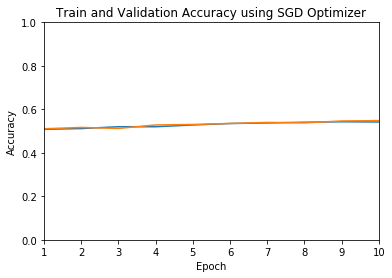

In [50]:
from matplotlib import pyplot as plt

plt.plot(range(1,11), SGD_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.show()

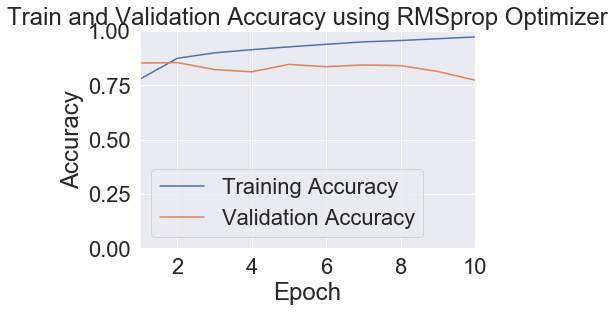

In [54]:
plt.plot(range(1,11), RMSprop_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

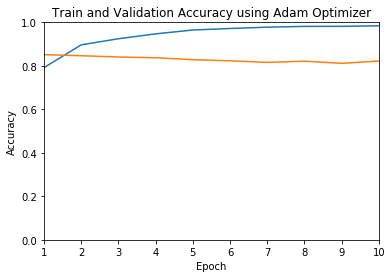

In [52]:
plt.plot(range(1,11), Adam_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.show()

Text(56.4062,0.5,'Actual')

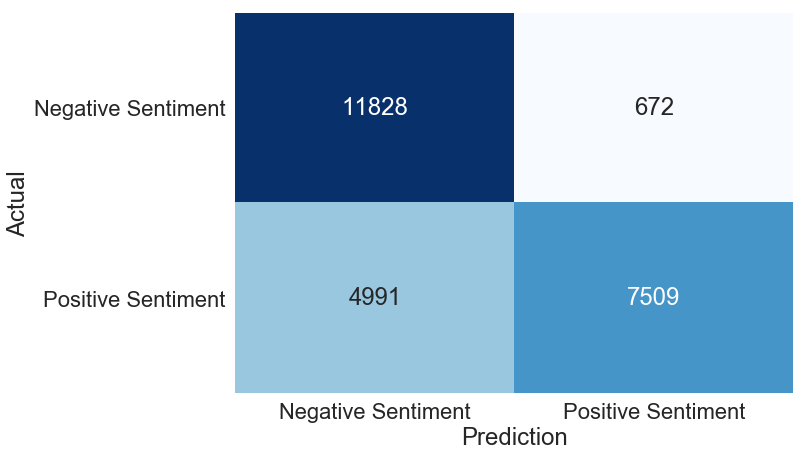

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,7))
sns.set(font_scale=2)
y_test_pred = RMSprop_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 'Positive Sentiment'],
                yticklabels=['Negative Sentiment', 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")